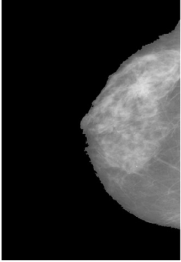

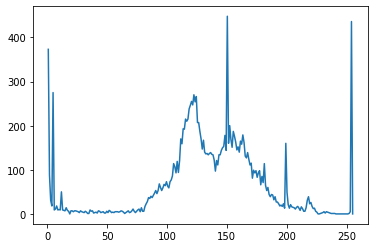

FINAL:
[255, 135.35484800068474, 164.10192100808942, 36.40317366539157, 101.70625952564066]
-6137146.316307854
FINAL:
[16.172061092246846, 200.63052774713793, 144.77408285144378, 71.12090193015868, 112.20469632883109]
-6136849.41501062
FINAL:
[255, 134.75625928013264, 36.91587274827735, 100.70441668881904, 164.2093337587394]
-6137146.597041044
FINAL:
[147.8932495309303, 71.59723588159848, 255, 16.578169288805856, 113.88481616862717]
-6137394.759526106
FINAL:
[163.96394227547137, 36.28268940576116, 255, 100.87337056137935, 134.53333641978776]
-6137146.9393757135
FINAL:
[1, 105.26367735657084, 255, 36.719598043136315, 145.20194597728891]
-6133398.460866757
FINAL:
[145.05378632305064, 105.74491607643262, 36.18683138724974, 1, 255]
-6133398.460866757
FINAL:
[129.83295633279414, 255, 161.19512670974962, 82.49942500935674, 20.529634481230595]
-6137317.569916222
FINAL:
[36.000840580204915, 163.18695120079107, 100.24404294752136, 134.1114136131224, 255]
-6137146.9393757135
FINAL:
[71.326870389

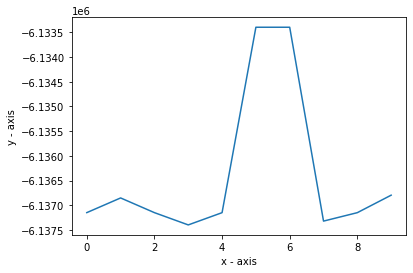

[255, 164.10192100808942, 135.35484800068474, 101.70625952564066, 36.40317366539157]


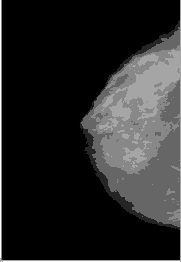

PSNR value for this image is 33.150644192153905
SSIM: 0.8977047144954373


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:223: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='1.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def add(a,b):
    return a+b

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            #GA
            particles=[]			
            for j in range(0,num_particles):
                particles.append([swarm[j].err_i,j])
            particles.sort()
            j=particles[num_particles-1][1]
            i1=particles[0][1]
            i2=particles[1][1]
            swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
            swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
            swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
            swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
            swarm[j].err_best_i=-1
            swarm[j].evaluate(costFunc)			
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



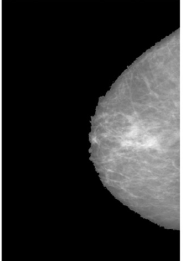

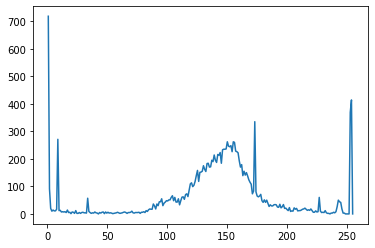

FINAL:
[17.221409997257204, 165.07615605423308, 79.1214555082595, 129.98915438067854, 254.99552618645657]
-6286918.862787258
FINAL:
[17.370372115626072, 139.1379581275235, 81.84473991863231, 207.6774275929098, 255]
-6284243.996938763
FINAL:
[124.88242690645063, 79.04019930270681, 155.44248150226065, 214.69362000626282, 17.57892477756179]
-6288418.5504194815
FINAL:
[5.945474985694021, 34.49688809955906, 85.30905767706722, 139.5097265144644, 207.0262786552883]
-6286348.555120027
FINAL:
[21.831478299049806, 127.97814529007621, 159.4194589656795, 80.06012667361313, 242.4117105161921]
-6288251.349430593
FINAL:
[156.64221782046806, 17.17142351395496, 79.38828024581423, 124.49261073947825, 228.65912330466665]
-6288363.004112449
FINAL:
[79.26389704301748, 17.23508316028369, 129.14183148891928, 254.88566201558336, 165.6825078961653]
-6286918.862787258
FINAL:
[119.741311630395, 154.46472974851966, 59.87194828730814, 8.92920154617385, 242.9159710181602]
-6287913.784678651
FINAL:
[214.979524703818

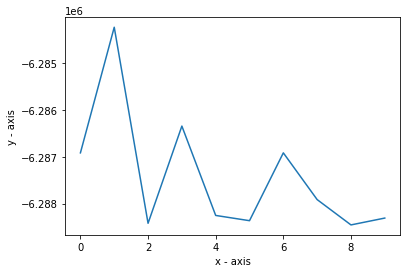

[242.16782800254475, 157.53107126860695, 124.94298874436628, 79.95240887705718, 17.61303835795492]


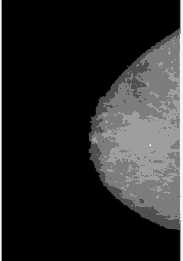

PSNR value for this image is 33.55967778984474
SSIM: 0.894390504588076


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:223: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='2.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def add(a,b):
    return a+b

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            #GA
            particles=[]			
            for j in range(0,num_particles):
                particles.append([swarm[j].err_i,j])
            particles.sort()
            j=particles[num_particles-1][1]
            i1=particles[0][1]
            i2=particles[1][1]
            swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
            swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
            swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
            swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
            swarm[j].err_best_i=-1
            swarm[j].evaluate(costFunc)			
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



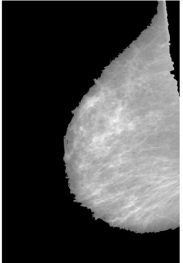

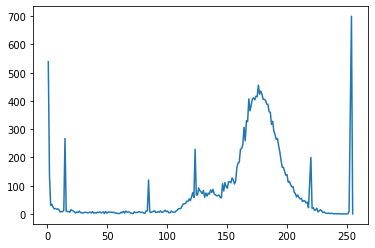

FINAL:
[108.06127893182949, 181.71286453846582, 151.47043249220835, 32.30282294358982, 253.0763461776381]
-10427970.258649375
FINAL:
[158.13088617811567, 49.24705657618827, 8.713361526152827, 109.89757192736562, 203.7786636901899]
-10427130.990631904
FINAL:
[254.82481076151993, 42.34834041686953, 180.43833976288087, 121.70088634200364, 153.57976670602127]
-10425965.553908963
FINAL:
[108.14864109059945, 32.96421722890662, 182.78402512442293, 253.96315558498407, 151.46182638791433]
-10427971.369789701
FINAL:
[8.131944398934932, 47.734199166764945, 109.91974834401694, 158.43551631926667, 203.1670770182211]
-10427107.12881631
FINAL:
[108.093938302127, 151.0660917469063, 32.883848083545544, 253.37808592675256, 182.08838258444692]
-10427971.369789701
FINAL:
[253.81810753851548, 182.11202266639364, 32.070756608016566, 108.49182704839878, 151.50391117022247]
-10427971.369789701
FINAL:
[180.05674362440908, 253.62277194878195, 12.477574948662173, 146.93251913191517, 83.89391391602852]
-10428022.

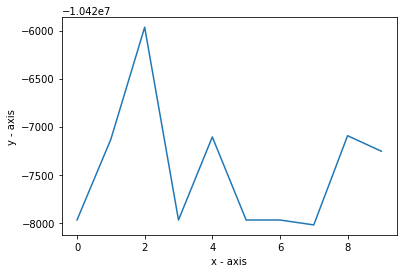

[253.0763461776381, 181.71286453846582, 151.47043249220835, 108.06127893182949, 32.30282294358982]


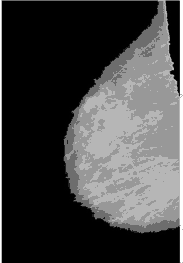

PSNR value for this image is 32.061031802227596
SSIM: 0.8669648487839032


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:223: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='3.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def add(a,b):
    return a+b

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            #GA
            particles=[]			
            for j in range(0,num_particles):
                particles.append([swarm[j].err_i,j])
            particles.sort()
            j=particles[num_particles-1][1]
            i1=particles[0][1]
            i2=particles[1][1]
            swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
            swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
            swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
            swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
            swarm[j].err_best_i=-1
            swarm[j].evaluate(costFunc)			
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



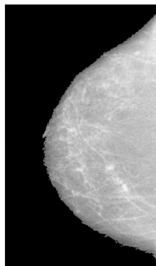

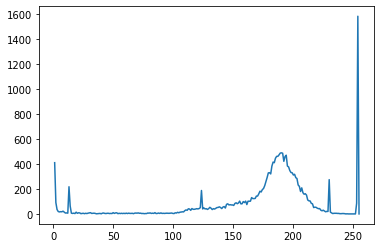

FINAL:
[29.947687875570196, 153.92938197063424, 187.38014933450847, 102.89814326902635, 254.2998242119233]
-11452359.64952072
FINAL:
[102.21587053561338, 155.1620703805822, 255.0, 189.10235264018308, 29.32401226119554]
-11451821.340815509
FINAL:
[102.63855472299844, 189.37348809189416, 29.15190661609531, 155.0358949912439, 255.0]
-11451821.340815509
FINAL:
[186.0238176010566, 231.2773428620876, 29.790553702933455, 102.87171176358537, 153.70943104778382]
-11451805.530018369
FINAL:
[183.00516779522147, 102.83194597075119, 29.01074167900837, 254.99193797695796, 150.07858037420112]
-11452276.388156647
FINAL:
[102.22304880718318, 187.30208471258402, 254.60576811663938, 153.94516819722838, 29.00533029986344]
-11452359.64952072
FINAL:
[102.65717084417624, 148.07476488149138, 29.50062926825789, 254.95577111038654, 184.65077133463453]
-11452272.5971443
FINAL:
[29.072800984438288, 165.8716392963027, 1.0, 102.23060098304144, 220.24078816079003]
-11447113.280889096
FINAL:
[1, 173.35399061547233, 1

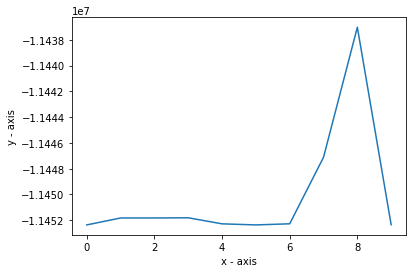

[254.2998242119233, 187.38014933450847, 153.92938197063424, 102.89814326902635, 29.947687875570196]


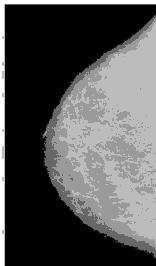

PSNR value for this image is 31.8550977563833
SSIM: 0.8322923692815356


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:223: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='4.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def add(a,b):
    return a+b

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            #GA
            particles=[]			
            for j in range(0,num_particles):
                particles.append([swarm[j].err_i,j])
            particles.sort()
            j=particles[num_particles-1][1]
            i1=particles[0][1]
            i2=particles[1][1]
            swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
            swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
            swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
            swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
            swarm[j].err_best_i=-1
            swarm[j].evaluate(costFunc)			
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



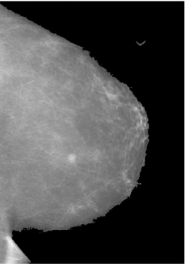

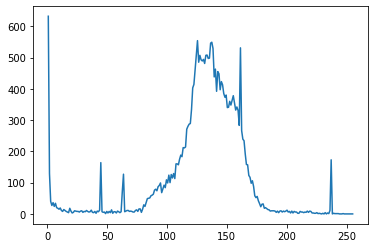

FINAL:
[117.47038788204382, 145.63189592230395, 77.01406978305798, 19.241413289546326, 255.0]
-9989758.024942245
FINAL:
[133.25744081995566, 19.420339427182846, 75.20836192256942, 111.86568012787949, 153.25305110596275]
-9993145.995980803
FINAL:
[80.35301058360177, 19.673908715908375, 117.53574303510209, 145.7992904964036, 255]
-9989742.44126995
FINAL:
[28.873166266254984, 237.10220418021092, 138.7568804917452, 98.83905829606402, 237.88487247889628]
-9983791.805015862
FINAL:
[74.65256015459626, 151.09436503098595, 12.130685686895434, 109.44974771812124, 131.0072372554161]
-9992730.001370274
FINAL:
[118.3734011504379, 81.53151252241693, 146.96786697995992, 37.638365013918786, 7.200746332338119]
-9992154.780724674
FINAL:
[19.348757160338177, 144.61162739418995, 117.60408930233265, 237.59953114652856, 77.15021625573132]
-9991782.68350606
FINAL:
[117.12041474670667, 145.98316877312416, 255, 77.20140582155128, 19.60521994329639]
-9989758.024942245
FINAL:
[77.21332219762824, 154.532056053474

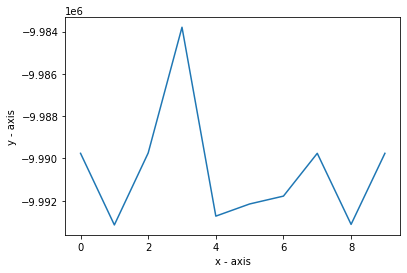

[255.0, 145.63189592230395, 117.47038788204382, 77.01406978305798, 19.241413289546326]


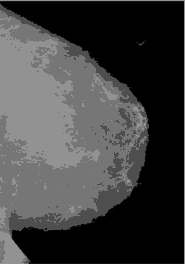

PSNR value for this image is 31.00722683118814
SSIM: 0.8290118482393684


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:223: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [6]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='5.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def add(a,b):
    return a+b

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            #GA
            particles=[]			
            for j in range(0,num_particles):
                particles.append([swarm[j].err_i,j])
            particles.sort()
            j=particles[num_particles-1][1]
            i1=particles[0][1]
            i2=particles[1][1]
            swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
            swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
            swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
            swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
            swarm[j].err_best_i=-1
            swarm[j].evaluate(costFunc)			
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



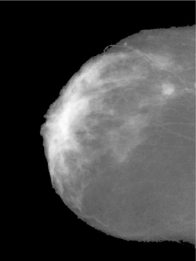

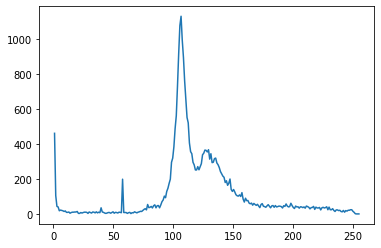

FINAL:
[77.01871899732981, 142.47472223093726, 23.376625102244475, 183.1067636317941, 117.67446171106816]
-9568523.159210611
FINAL:
[255.0, 18.609669909151815, 123.37749373503915, 171.11517680606698, 76.38803186999688]
-9564379.446234688
FINAL:
[184.15717992305292, 76.23108551646077, 143.18801264066678, 118.28570945006715, 18.14099972282594]
-9568592.941618398
FINAL:
[143.41433226396896, 184.8079062505615, 18.454902057459236, 76.32273304252034, 118.14134845466556]
-9568592.941618398
FINAL:
[55.18249598050253, 171.25818784025216, 91.74537579368781, 13.511455182866749, 123.14672216249788]
-9567374.511294134
FINAL:
[76.42153435669431, 18.543522242404816, 118.51516496028222, 143.86390896506228, 184.5148766722251]
-9568592.941618398
FINAL:
[13.867944185485056, 171.55107092710878, 124.38095371196188, 55.538059960031774, 91.00584207279209]
-9567378.288343422
FINAL:
[18.808211230750317, 76.07737196084051, 143.1727595076695, 118.62380276644348, 183.2802335882462]
-9568592.481820997
FINAL:
[18.0

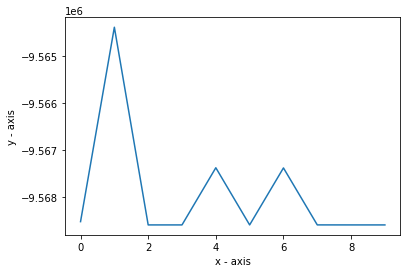

[184.14651983401487, 143.73548848476202, 118.62226595915806, 76.40522345035347, 18.040129368005204]


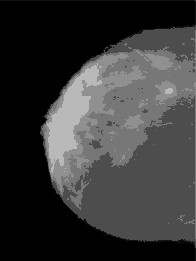

PSNR value for this image is 30.846263019490113
SSIM: 0.8504962368236133


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:223: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [7]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='6.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def add(a,b):
    return a+b

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            #GA
            particles=[]			
            for j in range(0,num_particles):
                particles.append([swarm[j].err_i,j])
            particles.sort()
            j=particles[num_particles-1][1]
            i1=particles[0][1]
            i2=particles[1][1]
            swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
            swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
            swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
            swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
            swarm[j].err_best_i=-1
            swarm[j].evaluate(costFunc)			
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



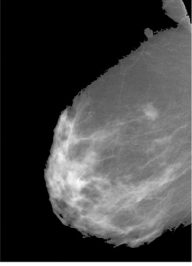

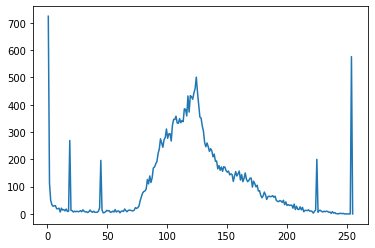

FINAL:
[42.65883650405196, 255, 108.91769663217968, 148.27505484609878, 1]
-9453054.318733584
FINAL:
[12.97892445945587, 143.4562389160892, 111.6809891056422, 189.48582452690226, 65.86492726747636]
-9465698.615436692
FINAL:
[255, 147.9191667968579, 106.51990036291092, 63.52806464043926, 12.093994752015103]
-9463799.359900001
FINAL:
[255, 151.99024273608663, 113.26896132784748, 65.19097914832174, 12.243975092798344]
-9464617.656087797
FINAL:
[189.40991580343388, 12.844121230051512, 142.6924481384051, 63.10169520029312, 110.25585980486477]
-9465695.484671671
FINAL:
[255, 151.9496176484599, 113.74989904962187, 65.14680535589618, 12.26282632796531]
-9464617.656087797
FINAL:
[63.79480941050659, 189.26224417969328, 142.58440851760162, 12.9686532851003, 110.24945221765934]
-9465695.484671671
FINAL:
[255, 151.78091169047445, 113.86208036351286, 65.48734106066917, 12.705745227726135]
-9464617.656087797
FINAL:
[255, 255, 108.18570696946922, 42.12097785243781, 148.47537509344383]
-9453054.3187335

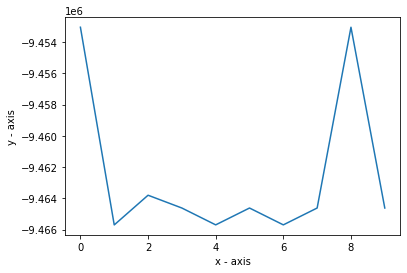

[255, 151.90959801594656, 113.20486748405432, 65.55322493688507, 12.842720839000869]


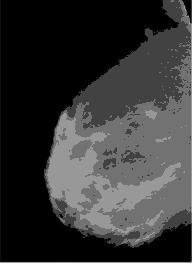

PSNR value for this image is 31.068678743453138
SSIM: 0.812671075887163


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:223: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [8]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='7.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def add(a,b):
    return a+b

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            #GA
            particles=[]			
            for j in range(0,num_particles):
                particles.append([swarm[j].err_i,j])
            particles.sort()
            j=particles[num_particles-1][1]
            i1=particles[0][1]
            i2=particles[1][1]
            swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
            swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
            swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
            swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
            swarm[j].err_best_i=-1
            swarm[j].evaluate(costFunc)			
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



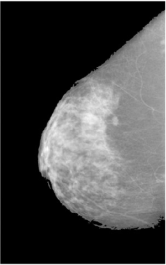

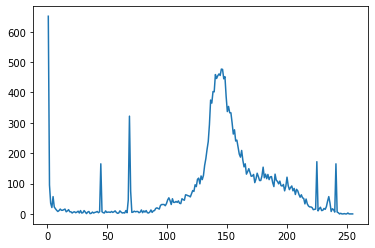

FINAL:
[133.4586282277043, 91.03793341898768, 172.92317733736965, 23.131493534418425, 241.7672887242684]
-8991593.899081808
FINAL:
[133.50433975041489, 23.211638026598834, 1.0, 173.47583727812793, 91.22207470823442]
-8991279.43278955
FINAL:
[156.54439131329153, 187.61798874505337, 25.428930833968764, 90.5346080650898, 129.55338046730867]
-8994876.120450333
FINAL:
[89.24198592549496, 129.26865637437845, 187.30263241334114, 22.048049489015575, 156.16901306156655]
-8994890.449309934
FINAL:
[148.1873967006796, 66.638135677179, 112.27923354672701, 14.451545935273163, 180.43458163306406]
-8994400.761630856
FINAL:
[22.412106022587455, 87.1115162898199, 156.9172817611492, 187.1239704505085, 127.93327627445949]
-8994871.403807797
FINAL:
[255, 90.35266626084363, 172.2955228512587, 23.15356992746674, 132.24098168393772]
-8991162.14992024
FINAL:
[9.744518846956113, 173.80043085163697, 91.3826988152488, 133.34512587966069, 45.83670530881575]
-8994032.436474804
FINAL:
[129.7276374023567, 187.0675768

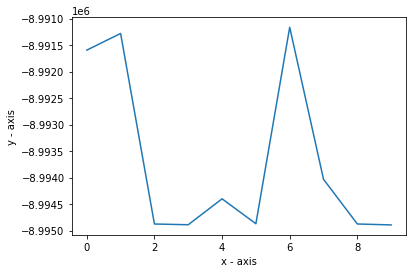

[187.31832768683077, 156.8782804004433, 128.11133193555105, 89.91692255274788, 23.49550353650658]


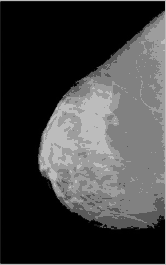

PSNR value for this image is 31.46553444024326
SSIM: 0.8739916017339867


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:223: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [9]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='8.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5

# print(h)

def add(a,b):
    return a+b

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2
    
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]

                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            #GA
            particles=[]			
            for j in range(0,num_particles):
                particles.append([swarm[j].err_i,j])
            particles.sort()
            j=particles[num_particles-1][1]
            i1=particles[0][1]
            i2=particles[1][1]
            swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
            swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
            swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
            swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
            swarm[j].err_best_i=-1
            swarm[j].evaluate(costFunc)			
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

